In [7]:
%matplotlib inline
import pandas_datareader as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np


#aapl = pdr.get_data_yahoo('AAPL', 
                          #start=datetime.datetime(2006, 10, 1), 
                          #end=datetime.datetime(2012, 1, 1))
#Note, see below
        
aapl = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], parse_dates=True)

Note that the Yahoo API endpoint has recently changed and that, if you want to already start working with the library on your own, you’ll need to install a temporary fix until the patch has been merged into the master brach to start pulling in data from Yahoo! Finance with pandas-datareader. Make sure to read up on the issue here before you start on your own!

In [8]:
aapl.head()

,Open,High,Low,Close,Volume,Adj Close
2006-10-02,75.10,75.87,74.30,74.860001,178159800.0,10.694285
2006-10-03,74.45,74.95,73.19,74.080002,197677200.0,10.582857
2006-10-04,74.10,75.46,73.16,75.380005,207270700.0,10.768572
2006-10-05,74.53,76.16,74.13,74.829994,170970800.0,10.690000
2006-10-06,74.42,75.04,73.81,74.220001,116739700.0,10.602858


In [9]:
aapl.tail()

,Open,High,Low,Close,Volume,Adj Close
2011-12-23,399.69,403.59,399.49,403.330017,67349800.0,57.618572
2011-12-27,403.10,409.09,403.02,406.529999,66269000.0,58.075714
2011-12-28,406.89,408.25,401.34,402.640015,57165500.0,57.520000
2011-12-29,403.40,405.65,400.51,405.119995,53994500.0,57.874287
2011-12-30,403.51,406.28,403.49,405.000000,44915500.0,57.857143


In [10]:
aapl.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1323.000000,1323.000000,1323.000000,1323.000000,1.323000e+03,1323.000000
mean,202.307082,204.662963,199.553787,202.224059,1.882896e+08,28.889151
std,98.861918,99.393085,98.208308,98.838135,1.027007e+08,14.119734
min,73.420000,73.980000,72.600000,73.230003,3.937360e+07,10.461429
25%,122.205000,124.270000,120.275000,122.020001,1.122037e+08,17.431429
50%,176.820000,179.500000,173.080000,175.840012,1.629866e+08,25.120001
75%,271.440000,273.930000,268.460000,270.899994,2.316230e+08,38.699999
max,421.760000,426.700000,415.990000,422.239990,8.432424e+08,60.320000


In [11]:
aapl.index

DatetimeIndex(['2006-10-02', '2006-10-03', '2006-10-04', '2006-10-05',
               '2006-10-06', '2006-10-09', '2006-10-10', '2006-10-11',
               '2006-10-12', '2006-10-13',
               ...
               '2011-12-16', '2011-12-19', '2011-12-20', '2011-12-21',
               '2011-12-22', '2011-12-23', '2011-12-27', '2011-12-28',
               '2011-12-29', '2011-12-30'],
              dtype='datetime64[ns]', length=1323, freq=None)

In [12]:
aapl.columns

Index([u'Open', u'High', u'Low', u'Close', u'Volume', u'Adj Close'], dtype='object')

In [15]:
last_ten_rows = aapl.Close[-10:]
last_ten_rows

2011-12-16    381.019989
2011-12-19    382.209991
2011-12-20    395.950012
2011-12-21    396.450012
2011-12-22    398.549988
2011-12-23    403.330017
2011-12-27    406.529999
2011-12-28    402.640015
2011-12-29    405.119995
2011-12-30    405.000000
Name: Close, dtype: float64

In [16]:
type(last_ten_rows)

pandas.core.series.Series

In [17]:
#Inspect first rows of Nov-Dec 2006
print(aapl.loc[pd.Timestamp("2006-11-01"):pd.Timestamp('2006-12-31')]).head()

             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.282857
2006-11-03  79.36  79.53  77.79  78.290001  107972200.0  11.184286
2006-11-06  78.95  80.06  78.43  79.709999  108644200.0  11.387143
2006-11-07  80.45  81.00  80.13  80.510002  131483100.0  11.501429


In [18]:
#Inspect the first rows of 2007
print(aapl.loc["2007"].head())

             Open   High    Low      Close       Volume  Adj Close
2007-01-03  86.29  86.58  81.90  83.800003  309579900.0  11.971429
2007-01-04  84.05  85.95  83.82  85.659996  211815100.0  12.237143
2007-01-05  85.77  86.20  84.40  85.049995  208685400.0  12.150000
2007-01-08  85.96  86.53  85.28  85.470001  199276700.0  12.210000
2007-01-09  86.45  92.98  85.15  92.570000  837324600.0  13.224286


In [19]:
#Inspect November 2006 using positinal indexing
print(aapl.iloc[22:43])

             Open   High    Low      Close       Volume  Adj Close
2006-11-01  81.10  81.38  78.36  79.160004  152798100.0  11.308572
2006-11-02  78.92  79.32  78.50  78.979996  116370800.0  11.282857
2006-11-03  79.36  79.53  77.79  78.290001  107972200.0  11.184286
2006-11-06  78.95  80.06  78.43  79.709999  108644200.0  11.387143
2006-11-07  80.45  81.00  80.13  80.510002  131483100.0  11.501429
2006-11-08  80.02  82.69  79.89  82.449997  172729200.0  11.778571
2006-11-09  82.90  84.69  82.12  83.339996  230763400.0  11.905714
2006-11-10  83.55  83.60  82.50  83.120003   93466100.0  11.874286
2006-11-13  83.22  84.45  82.64  84.349998  112668500.0  12.050000
2006-11-14  84.80  85.00  83.90  85.000000  147238700.0  12.142858
2006-11-15  85.05  85.90  84.00  84.050003  163830800.0  12.007143
2006-11-16  84.87  86.30  84.62  85.610001  173485200.0  12.230000
2006-11-17  85.14  85.94  85.00  85.850006  116606000.0  12.264286
2006-11-20  85.40  87.00  85.20  86.470001  142698500.0  12.35

In [20]:
#Inspect the Open and Close values for 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43],[0,3]])

            Open      Close
2006-11-01  81.1  79.160004
2006-12-01  91.8  91.320000


In [27]:
#Inspect the Open and Close values for November
print(aapl.iloc[22:43, [0,3]])

             Open      Close
2006-11-01  81.10  79.160004
2006-11-02  78.92  78.979996
2006-11-03  79.36  78.290001
2006-11-06  78.95  79.709999
2006-11-07  80.45  80.510002
2006-11-08  80.02  82.449997
2006-11-09  82.90  83.339996
2006-11-10  83.55  83.120003
2006-11-13  83.22  84.349998
2006-11-14  84.80  85.000000
2006-11-15  85.05  84.050003
2006-11-16  84.87  85.610001
2006-11-17  85.14  85.850006
2006-11-20  85.40  86.470001
2006-11-21  87.42  88.599998
2006-11-22  88.99  90.309998
2006-11-24  89.53  91.630005
2006-11-27  92.51  89.540001
2006-11-28  90.36  91.809998
2006-11-29  93.00  91.799995
2006-11-30  92.21  91.660004


In [28]:
sample = aapl.sample(20)
print sample

              Open    High     Low       Close       Volume  Adj Close
2007-07-06  133.13  133.34  130.40  132.300003  218673700.0  18.900000
2009-08-10  165.66  166.60  163.66  164.720001   75073600.0  23.531429
2010-01-06  214.38  215.23  210.75  210.970001  138040000.0  30.138571
2008-11-28   94.70   94.76   91.86   92.669998   74443600.0  13.238571
2010-07-06  251.00  252.80  246.16  248.629990  153808900.0  35.518570
2009-05-22  124.05  124.18  121.75  122.500000   74499600.0  17.500000
2011-08-03  390.98  393.55  382.24  392.570007  183127000.0  56.081429
2011-06-24  331.37  333.15  325.09  326.350006  109951800.0  46.621429
2007-08-06  132.90  135.27  128.30  135.250000  231292600.0  19.321428
2008-08-19  174.54  177.07  171.81  173.529999  154051100.0  24.790001
2010-05-28  259.39  259.40  253.35  256.880005  203903700.0  36.697144
2011-02-09  355.19  359.00  354.87  358.160004  120686300.0  51.165714
2007-02-15   85.44   85.62   84.78   85.209999   90915300.0  12.172857
2010-0

In [31]:
monthly_aapl = aapl.resample("M").mean()
monthly_aapl.head()

,Open,High,Low,Close,Volume,Adj Close
2006-10-31,77.020455,77.866364,76.251818,77.125909,1.634995e+08,11.017987
2006-11-30,85.130952,86.202381,84.202857,85.344762,1.647010e+08,12.192109
2006-12-31,86.911000,87.825500,85.439000,86.471500,2.111349e+08,12.353071
2007-01-31,89.056500,90.166000,87.658000,88.881499,3.401223e+08,12.697357
2007-02-28,85.764737,86.680526,84.782632,85.727895,1.805573e+08,12.246842


In [33]:
aapl["diff"] = aapl["Close"] - aapl["Open"]
aapl.head()

,Open,High,Low,Close,Volume,Adj Close,diff
2006-10-02,75.10,75.87,74.30,74.860001,178159800.0,10.694285,-0.239999
2006-10-03,74.45,74.95,73.19,74.080002,197677200.0,10.582857,-0.369998
2006-10-04,74.10,75.46,73.16,75.380005,207270700.0,10.768572,1.280005
2006-10-05,74.53,76.16,74.13,74.829994,170970800.0,10.690000,0.299994
2006-10-06,74.42,75.04,73.81,74.220001,116739700.0,10.602858,-0.199999


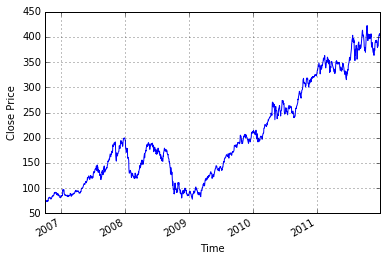

In [35]:
aapl["Close"].plot(grid=True)
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.show()

# Common Financial Analysis

## Part 1: Returns

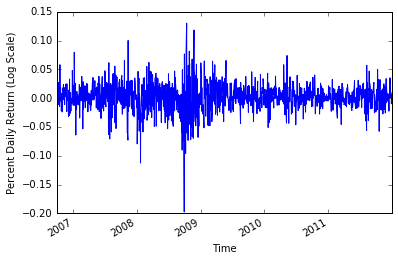

In [38]:
#Daily percentage change
daily_close = aapl[["Adj Close"]]
    #double brackets return it as a dataframe
    
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)
daily_log_returns = np.log(daily_close.pct_change()+1)
    #why plus 1?

daily_log_returns.head()
daily_log_returns["Adj Close"].plot()
plt.xlabel("Time")
plt.ylabel("Percent Daily Return (Log Scale)")
plt.show()

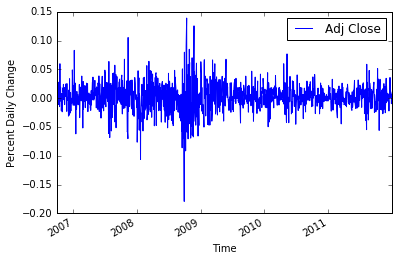

In [39]:
daily_pct_change.head()
daily_pct_change[["Adj Close"]].plot()
plt.xlabel("Time")
plt.ylabel("Percent Daily Change")
plt.show()

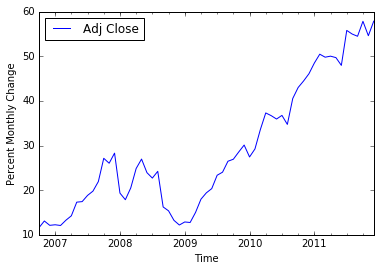

In [41]:
#Percent Change over montly or quarterly returns
    #Resample aapl to business months, taking the last observation as the value (vs taking the mean of the month)
monthly = aapl.resample("BM").apply(lambda x: x[-1])
monthly.pct_change()

quarters = aapl.resample("4M").mean()
quarters.pct_change()

monthly[["Adj Close"]].plot()
plt.xlabel("Time")
plt.ylabel("Percent Monthly Change")
plt.show()

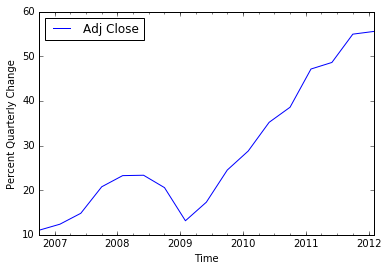

In [42]:
quarters[["Adj Close"]].plot()
plt.xlabel("Time")
plt.ylabel("Percent Quarterly Change")
plt.show()

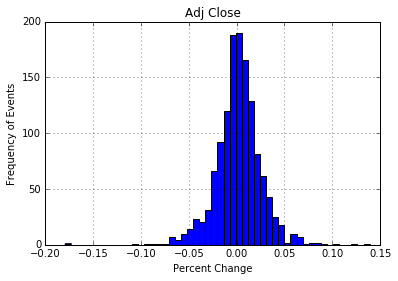

In [43]:
#Plot the distribution of daily_pct_change

daily_pct_change.hist(bins=50)
plt.xlabel("Percent Change")
plt.ylabel("Frequency of Events")
plt.show()

In [44]:
daily_pct_change.describe()

,Adj Close
count,1323.000000
mean,0.001565
std,0.023983
min,-0.179195
25%,-0.010661
50%,0.001646
75%,0.014285
max,0.139050


In [45]:
#Cumulative daily rate of return : the aggregate amt/pct an investment has gained or lost over time

cum_daily_return = (1+daily_pct_change).cumprod()
cum_daily_return.head()

,Adj Close
2006-10-02,1.000000
2006-10-03,0.989581
2006-10-04,1.006946
2006-10-05,0.999599
2006-10-06,0.991451


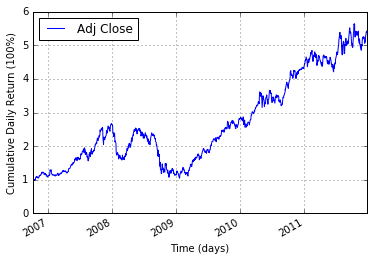

In [47]:
cum_daily_return.plot(grid=True)
plt.xlabel("Time (days)")
plt.ylabel("Cumulative Daily Return (100%)")
plt.show()

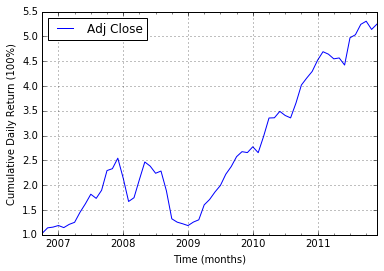

In [49]:
cum_monthly_return = cum_daily_return.resample("M").mean()

cum_monthly_return.plot(grid=True)
plt.xlabel("Time (months)")
plt.ylabel("Cumulative Daily Return (100%)")
plt.show()

Knowing how to calculate returns is a valuable skill, but they are even more informative when compared to another stock. In the next section, we will get more data from Yahoo! Finance to compare between stocks.

Update (6/29/17): Yahoo Finance API issue
Over the last few weeks, Yahoo finance has changed the structure of its website and as a result the most popular Python packages for retrieving data have stopped functioning properly. Until this is resolved, the following piece of code will provide sufficient data to run the examples in this series of articles. Data is now taken from Google Finance and we are using the ETF “SPY” as proxy for S&P 500 on Google Finance.

Please not that if you use this set of data to run the example, you may be getting slightly different results.

In [61]:
#Make a function that takes in the ticker symbol and a start and end date. 
#Yahoo changed their API end-point 
'''
def get(tickers, startdate, enddate):
    def data(ticker):
        data_source = 'google'
        return (pdr.DataReader(ticker, data_source, start=startdate, end=enddate))
    datas = map(data, tickers)
    return (pd.concat(data, keys=tickers, names=['Ticker', 'Date']))
    
This function came from the DataCamp tutorial, but the python packages no longer work with the Yahoo API. Used a single line
of code below to extract out the data.
'''


tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']

all_data = (pdr.DataReader(tickers, 'google', datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))).to_frame()
all_data.head()

Open   High    Low  Close       Volume
Date       minor                                         
2006-10-02 AAPL   10.73  10.84  10.61  10.69  178263043.0
           IBM    81.76  82.47  81.58  81.87    4483300.0
           MSFT   27.32  27.49  27.15  27.36   52928741.0
2006-10-03 AAPL   10.64  10.71  10.46  10.58  197724611.0
           IBM    81.88  82.26  81.56  81.65    4838500.0

In [81]:
#Reorder the indices to group and sort by Ticker symbol as the major index
sorted_data = all_data.reorder_levels([1,0], axis=0).sort_index(0)
idx = sorted_data.index
idx.set_names('Ticker', level=0, inplace=True)
sorted_data.index = idx
sorted_data.head()

Open   High    Low  Close       Volume
Ticker Date                                               
AAPL   2006-10-02  10.73  10.84  10.61  10.69  178263043.0
       2006-10-03  10.64  10.71  10.46  10.58  197724611.0
       2006-10-04  10.59  10.78  10.45  10.77  209840785.0
       2006-10-05  10.65  10.88  10.59  10.69  170994999.0
       2006-10-06  10.63  10.72  10.54  10.60  116749486.0

In [90]:
from_datacamp = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/all_stock_data.csv", index_col= [0,1], header=0, parse_dates=[1])
adj_close = from_datacamp[["Adj Close"]]
data = pd.concat([sorted_data, adj_close], axis=1)
data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,3967.000000,3967.000000,3967.000000,3967.000000,3.967000e+03,5292.000000
mean,59.825147,60.456925,59.231439,59.880141,8.741011e+07,108.093513
std,48.690438,49.114294,48.354699,48.773206,9.753951e+07,96.206514
min,10.490000,10.570000,10.370000,10.460000,2.081260e+06,10.461429
25%,25.025000,25.340000,24.650000,25.005000,8.844110e+06,26.596429
50%,30.020000,30.330000,29.830000,30.040000,5.906884e+07,66.029999
75%,103.105000,104.775000,102.180000,103.280000,1.202383e+08,172.990005
max,193.640000,194.900000,192.400000,194.560000,8.432640e+08,369.509979


In [91]:
from_datacamp.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5292.000000,5292.000000,5292.000000,5292.000000,5292.000000,5.292000e+03
mean,108.091934,109.264359,106.886679,214.747783,108.093513,6.768845e+07
std,96.272141,97.216791,95.217117,191.748210,96.206514,9.097254e+07
min,10.488571,10.568571,10.371428,15.150000,10.461429,1.027500e+06
25%,26.600000,26.937501,26.275001,63.069999,26.596429,6.952525e+06
50%,66.495712,68.968573,64.463572,129.414993,66.029999,2.707570e+07
75%,172.604287,175.527080,170.088135,361.726898,172.990005,9.389922e+07
max,369.181213,372.224823,361.146332,739.759033,369.509979,8.432424e+08


The data derived from DataCamp contains ~1300 entries. Not immediately clear why as the data should theoretically be the same as what is pulled from Google Finance. As this is a DataCamp tutorial, moving forward with the DataCamp data

In [92]:
daily_close_px = from_datacamp[["Adj Close"]].reset_index().pivot('Date', 'Ticker', 'Adj Close')
    #DataFrame.pivot(index=None, columns=None, values=None)
    #reset_index()seems as though it just clears the pre-defined index
daily_close_px.head()

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
2006-10-02,10.694285,199.970459,81.870003,27.360001
2006-10-03,10.582857,201.265610,81.650002,27.370001
2006-10-04,10.768572,207.073837,83.099998,27.940001
2006-10-05,10.690000,205.136093,82.919998,27.920000
2006-10-06,10.602858,209.464874,83.139999,27.870001


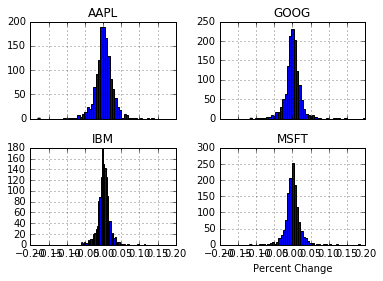

In [94]:
daily_pct_change = daily_close_px.pct_change()
daily_pct_change.hist(bins=50, sharex=True)
plt.xlabel("Percent Change")
plt.show()

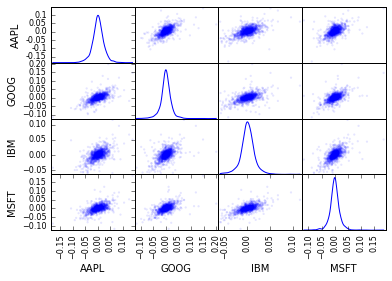

In [96]:
#Plot a scatter matrix : used to determine whether the data are correlated and whether the correlation is (+) or (-)
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1)
plt.show()

Based on these scatter plots, we can observe that each stock is at the least positively correlated with the others, though some are more positive (IBM as a function of GOOG, AAPL and MSFT) than others (GOOG as a function of IBM). Derive that information by looking at the slope of the scatter.

The diagonal of the scatter plot (MSFT vs MSFT, etc) uses Kernel Density Estimate which estimates the probability density function of a random variable. Much more to learn about KDE.

# Common Financial Analysis


## Part 2: Moving Windows

A moving window is there when one computes a statistic on a window of data represented by a specific time period and then slides that across the data by a specified interval. An example is rolling average, which smoothes out short-term fluctuations and highlights longer-term trends in the data.

In [99]:
adj_close_px = aapl[["Adj Close"]]
moving_avg = adj_close_px.rolling(window=40).mean()
print moving_avg[-10:]
print adj_close_px[-10:]

            Adj Close
2011-12-16  55.529679
2011-12-19  55.491607
2011-12-20  55.456536
2011-12-21  55.451822
2011-12-22  55.444500
2011-12-23  55.439643
2011-12-27  55.445286
2011-12-28  55.437643
2011-12-29  55.468393
2011-12-30  55.495500
            Adj Close
2011-12-16  54.431427
2011-12-19  54.601429
2011-12-20  56.564285
2011-12-21  56.635715
2011-12-22  56.935715
2011-12-23  57.618572
2011-12-27  58.075714
2011-12-28  57.520000
2011-12-29  57.874287
2011-12-30  57.857143


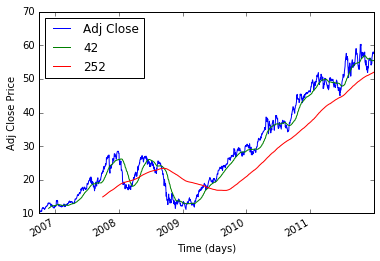

In [109]:
aapl['42'] = adj_close_px.rolling(window=40).mean()
aapl['252'] = adj_close_px.rolling(window=252).mean()
aapl[['Adj Close', '42', '252']].plot()
plt.xlabel("Time (days)")
plt.ylabel("Adj Close Price")
plt.show()

### Volatility Calculation

The volatility of a stock is a measurement of the change in variance in the returns of the stock over a specific time period. 

volatility = std*sqrt(Time)

The moving historical std dev of the log returns - ie the moving historical volatility - may hold more interesting data. This is referred to as the annualized volatility.

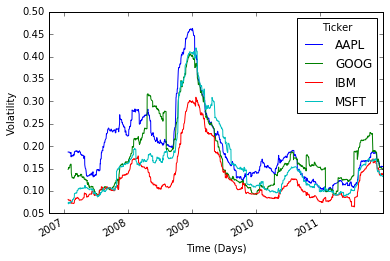

In [111]:
min_periods = 75
vol = daily_pct_change.rolling(min_periods).std()*np.sqrt(min_periods)
vol.plot()
plt.xlabel("Time (Days)")
plt.ylabel("Volatility")
plt.show()

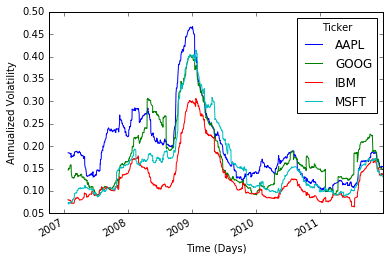

In [112]:
ann_vol = (np.log(daily_pct_change+1)).rolling(min_periods).std()*np.sqrt(min_periods)
ann_vol.plot()
plt.xlabel("Time (Days)")
plt.ylabel("Annualized Volatility")
plt.show()

### Ordinary Least-Squares Regression (OLS)


In [130]:
#from inspect import getargspec, ismethod, isclass, formatargspec
#import statsmodels.api as sm 
from pandas.core import datetools

all_adj_close = from_datacamp[["Adj Close"]]
all_returns = np.log(all_adj_close/all_adj_close.shift(1))
    #or all_returns = np.log(all_adj_close.pct_change()+1)
    
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == "AAPL"]
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

X = sm.tools.tools.add_constant(return_data['AAPL'])
model = sm.regression.linear_model.OLS(return_data['MSFT'], X).fit()
print(model.summary())

AttributeError: 'module' object has no attribute 'regression'

Having trouble with the statsmodels.api import (importerror: cannot import name 'getargspec').This is the output though of the model for analysis sake (Ignore the SyntaxError, this is merely pasted from DataCamp for continuity):

In [131]:
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     514.2
Date:                Thu, 27 Jul 2017   Prob (F-statistic):           2.07e-96
Time:                        19:33:08   Log-Likelihood:                 3513.2
No. Observations:                1322   AIC:                            -7022.
Df Residuals:                    1320   BIC:                            -7012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.000     -1.287      0.198      -0.002       0.000
AAPL           0.4404      0.019     22.677      0.000       0.402       0.479
==============================================================================
Omnibus:                      267.360   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6987.230
Skew:                          -0.202   Prob(JB):                         0.00
Kurtosis:                      14.255   Cond. No.                         41.6
==============================================================================

SyntaxError: invalid syntax (<ipython-input-131-d7dc26811f6d>, line 1)

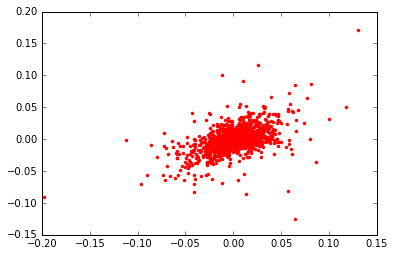

In [139]:
from sklearn import linear_model

#regression = linear_model.LinearRegression()
#aapl_data = np.asarray(return_data['AAPL'])
#regression.fit(np.asarray(return_data['AAPL']), np.asarray(return_data['MSFT']))

plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')
#plt.plot(return_data['AAPL'], regression.predict(return_data['AAPL'], color='blue'))
plt.show()

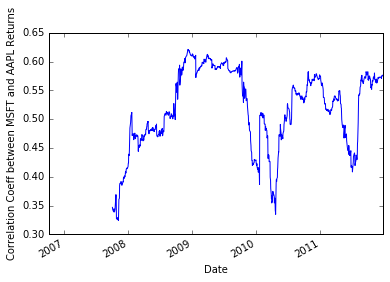

In [143]:
#Plot the rolling correlation

return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.ylabel("Correlation Coeff between MSFT and AAPL Returns")
plt.show()

# Building a Trading Strategy 

### The Moving Average Crossover
The "hello world" of quantitative trading. If the short moving average exceeds the long moving average, then you go long (buy). If teh long moving average exceeds the short moving average then you go short (sell).

In [172]:
short_window = 40
long_window = 100

signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

long_signals = np.where(signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:], 1.0, 0.0)
signals['signal'][short_window:] = long_signals

signals['positions'] = signals['signal'].diff()
print signals


            signal  short_mavg   long_mavg  positions
2006-10-02     0.0   74.860001   74.860001        NaN
2006-10-03     0.0   74.470001   74.470001        0.0
2006-10-04     0.0   74.773336   74.773336        0.0
2006-10-05     0.0   74.787500   74.787500        0.0
2006-10-06     0.0   74.674001   74.674001        0.0
2006-10-09     0.0   74.666667   74.666667        0.0
2006-10-10     0.0   74.544285   74.544285        0.0
2006-10-11     0.0   74.380000   74.380000        0.0
2006-10-12     0.0   74.477778   74.477778        0.0
2006-10-13     0.0   74.532001   74.532001        0.0
2006-10-16     0.0   74.610909   74.610909        0.0
2006-10-17     0.0   74.584167   74.584167        0.0
2006-10-18     0.0   74.580000   74.580000        0.0
2006-10-19     0.0   74.895000   74.895000        0.0
2006-10-20     0.0   75.232000   75.232000        0.0
2006-10-23     0.0   75.621250   75.621250        0.0
2006-10-24     0.0   75.940588   75.940588        0.0
2006-10-25     0.0   76.2594

**Signals:**  
if 1.0, then go/stay long  
if 0.0, then go/stay short  
  
**Position:**  
0.0 = stay the same  
-1.0 = sell/go short  
1.0 = buy/go long

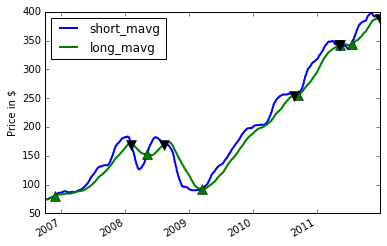

In [173]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Price in $')

#aapl['Adj Close'].plot(ax=ax1, color='r', lw=2.)

signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.short_mavg[signals.positions == 1.0], '^', markersize=10, color='green')

#Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.short_mavg[signals.positions == -1.0], 'v', markersize=10, color='k')

plt.show()

### Backtesting the Trading Strategy

Test the strategy on relevant historical data to make sure that it's an actual viable strategy before making moves. Can simulate and analyze the risk and profitability of trading with a specific strategy.  

**Pitfalls:**  
Macroecominc events (regulatory changes)  
Liquidity restraints (banning of short sales)  
Overfitting  
Interference (ignoring strategy rules bc you're smarter)  
Lookahead bias (introducing new information into historical data)  
Etc.  
  
**Essential Components**  
1. A data handler: an interface to a set of data  
2. A strategy, generates a signal  
3. A portfolio, generates orders and manages Profit & Loss  
4. An execution handler, sends the order to the borker and receives the "fills" - signals that the stock has been either bought or sold  


### Implementation of a Simple Backtester

In [190]:
initial_capital = float(100000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions["AAPL"] = 100*signals['signal']

portfolio = positions.multiply(aapl['Adj Close'], axis=0)

diff_positions = positions.diff()

portfolio['holdings'] = (positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (diff_positions.multiply(aapl['Adj Close'], axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

portfolio

,AAPL,holdings,cash,total,returns
2006-10-02,0.0000,0.0000,NaN,NaN,NaN
2006-10-03,0.0000,0.0000,100000.0000,100000.0000,NaN
2006-10-04,0.0000,0.0000,100000.0000,100000.0000,0.000000
2006-10-05,0.0000,0.0000,100000.0000,100000.0000,0.000000
2006-10-06,0.0000,0.0000,100000.0000,100000.0000,0.000000
2006-10-09,0.0000,0.0000,100000.0000,100000.0000,0.000000
2006-10-10,0.0000,0.0000,100000.0000,100000.0000,0.000000
2006-10-11,0.0000,0.0000,100000.0000,100000.0000,0.000000
2006-10-12,0.0000,0.0000,100000.0000,100000.0000,0.000000
2006-10-13,0.0000,0.0000,100000.0000,100000.0000,0.000000


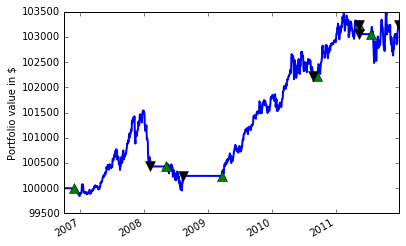

In [194]:
fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel="Portfolio value in $")

portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, portfolio.total[signals.positions == 1.0], '^', markersize=10, color='green')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, portfolio.total[signals.positions == -1.0], 'v', markersize=10, color='k')

plt.show()

### Evaluating the Moving Average Crossover Strategy

**Sharpe Ratio**  
Ideal situation is the returns are considerable but the additional risk of investing is as small as possible.  
The greater the Sharpe ratio the better as it is the ratio of the returns over the additional risk. A ratio greater than 1 is acceptable, 2 is very good, and 3 is excellent.


In [196]:
returns = portfolio['returns']

#annualized Sharpe ratio. Sort of, the risk free rate is excluded and the ratio is usually compared to other stocks.
sharpe_ratio = np.sqrt(252)*(returns.mean()/returns.std()) #252 is the yearly trading day window

print sharpe_ratio

0.727152390856


**Maximum Drawdown**  
Measures the largest single drop from peak to bottom before a new peak is achieved. The score indicates the risk of a portfolio.

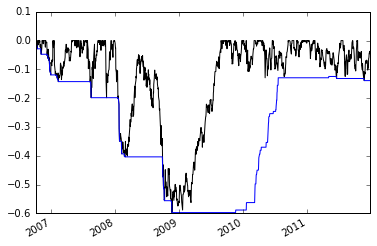

In [203]:
window = 252

rolling_max = aapl['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj Close']/rolling_max - 1.0

max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

daily_drawdown.plot(color='k')
max_daily_drawdown.plot()

plt.show()

**Compound Annual Growth Rate**  
Provides a constant rate of return over the time period. Basically gives you what you really have at teh end of your investment period.

Formula: (Ending Value/Beginning Value)^(1/n) - 1  
n = number of time periods  
1 is one year

In [205]:
days = (aapl.index[-1] - aapl.index[0]).days

cagr = ((((aapl['Adj Close'][-1])/aapl['Adj Close'][1]))**(365.0/days)) - 1
cagr

0.38234456205981959